<a href="https://colab.research.google.com/github/oscarserc/TESIS/blob/main/PASO_3b___CNN_3D____grid28x28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**UTILIZACIÓN DE TÉCNICAS DE APRENDIZAJE AUTOMÁTICO PARA LA DETECCIÓN DE LOS NODOS CONFLICTIVOS EN UNA RED SOCIAL**.

La base de datos que emplearemos puede llegar a unas 12.000 observaciones. El tamaño crece rápidamente. Por ejemplo 4000 observaciones son aproximadamente 50 MB.

· Pruebas iniciales con: 4.000 observaciones

· Para ello generamos una 100 **simulaciones**, y guardamos unos 40 **frames** de cada una de ellas

· Además como **target** guardamos la matriz con la IDENTIDAD de todos y cada uno de los AGENTES.



#**PRUEBA 2**: Utilizaremos una <font color='green'>**RED NEURONAL CONVOLUCIONAL 3D**</font>, ya que nos permite preservar el orden de los frames en cada SIMULACIÓN.

#Planteamos nuevamente el problema de localizar a los agentes influyentes como un problema de **Segmentación** de imágenes. (Cada pixel corresponde a un agente y ha de ser clasificado en uno de los tipos que se han definico)

La estructura que hemos probado de partida es la que aparece a continuación (*Prueba final al final del archivo (v2): con una profundidad del kernel igual al número de frames consecutivos que se prentenden procesar*).


<figure>
<center>
<img src='https://github.com/oscarserc/IMAGENES/blob/main/CNN_3D__4___pruebas_a4__Sementacion2clases.png?raw=true' width="1050"/>
<figcaption>fig. 1: En esta primera prueba manejamos sólo dos tipos de agentes: <b>Agente EMOCIONAL</b> y <b>Agente MUTANTE TRAIDOR</b>. Por ello el problema se trata de uno de CLASIFICACIÓN BINARIA. Cada pixel ha de ser marcado como perteneciente a una población u otra. La salida de la red son dos matrices de 28x28 con la probabilidad de pertenencia a cada clase.</figcaption></center>
</figure>


El archivo de prueba contiene 4000 simulaciones de una población de AGENTES EMOCIONALES y TRAIDORES.


<figure>
<center>
<img src='https://github.com/oscarserc/IMAGENES/blob/main/Archivo_F_CNN_28x28_Barajado.png?raw=true' width="1000"/>
<figcaption></figcaption></center>
</figure>





Podemos comenzar **aleatorizando**, y después manteniendo agrupadas las observaciones (frames) que forman parte de la misma Simulación (animación).

#CARGA DE LA BASE DE DATOS (mezcla agentes **emocionales** y mutantes **traidores**).

Como hemos de empaquetar los frames asociados a cada simulación (inicialmente en la base de prueba: 100 simulaciones x 40 frames = 4000 observaciones en el data frame), la aleatorización habremos de hacerla al final. De esta manera conservamos la relación temporal entre frames.

**POBLACIÓN 1**. Base de datos de 4000 observaciones (agentes emocionales y agentes acosadores infiltrados).

In [ ]:

#import pandas as pd

# CARGAMOS LA BASE DE DATOS SIN PERMUTAR LAS FILAS
# ------------------------------------------------
#bd_simulaciones = pd.read_csv('bd_combinado.csv')


**POBLACIÓN 2**. Base de datos con 100 simulaciones de un grid de 28x28. La población mutante es del 15%.

In [1]:


import pandas as pd

# CARGAMOS LA BASE DE DATOS SIN PERMUTAR LAS FILAS (grid de 28x28, y población 85-15 emocionales/mutantes)
# ------------------------------------------------
bd_simulaciones = pd.read_csv('bd_100simulaciones_28x28_emo85_vs_15.csv')



In [2]:

pd.options.display.float_format = '{:,.1f}'.format
bd_simulaciones


,r0,r1,r2,r3,r4,r5,r6,r7,r8,r9,...,b777,b778,b779,b780,b781,b782,b783,Simulacion_ID,Frame,Target
0,0.7,0.7,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.4,0.4,0.2,0.0,0.0,0.0,0.0,1,1,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
1,1.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.4,0.4,0.2,0.0,0.0,0.0,0.0,1,2,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
2,1.0,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.4,0.4,0.2,0.0,0.0,0.0,0.0,1,3,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
3,0.7,0.7,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.4,0.4,0.2,0.0,0.0,0.0,0.0,1,4,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
4,1.0,1.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.2,...,0.4,0.4,0.2,0.0,0.0,0.0,0.0,1,5,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.3,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,36,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3996,0.3,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,37,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3997,0.3,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,38,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3998,0.3,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100,39,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."


#Variables explicativas: **X**

In [3]:

import matplotlib.pyplot as plt
import numpy as np

size       = 28  # <--------------------- LA POBLACIÓN 2 ES DE UN GRID DE 28x28
num_frames = 40
df         = bd_simulaciones.copy()

lista_RGBs         = []
lista_simulaciones = []

X            = []

nombre_columnas_ROJO  = ['r' + str(indice) for indice in range(size*size)]
nombre_columnas_VERDE = ['g' + str(indice) for indice in range(size*size)]
nombre_columnas_AZUL  = ['b' + str(indice) for indice in range(size*size)]

# Iteramos por las 8000 filas de la base de datos de prueba
for fila in range(len(bd_simulaciones)):
  canal_r = pd.array(df[nombre_columnas_ROJO].iloc[fila]).reshape(size,size)
  canal_v = pd.array(df[nombre_columnas_VERDE].iloc[fila]).reshape(size,size)
  canal_a = pd.array(df[nombre_columnas_AZUL].iloc[fila]).reshape(size,size)

  # CUIDADO que np.dstack apila los tres valores de cada pixel
  # ----------------------------------------------------------
  frame = np.array([canal_r, canal_v, canal_a])

  lista_RGBs.append(frame)

  if ((fila+1) % num_frames == 0):
    lista_simulaciones.append(np.array(lista_RGBs))
    lista_RGBs = []


X = np.array(lista_simulaciones)
X.shape


(100, 40, 3, 28, 28)

#Target: **Y**.

In [4]:

lista_targets            = []
lista_targets_simulacion = []

for fila in range(len(bd_simulaciones)):
  lista_id_agentes = bd_simulaciones.iloc[fila]['Target'].replace('[','').replace(']','')
  target = [int(caracter) for caracter in lista_id_agentes.split(',')]
  target = np.array(target)
  target = target.reshape(size,size)

  # Con los paréntesis  '['  ']' sale de dimensión: (8000, 1, 10, 10)   # <-------------------------- Aquí ajusto la DIMENSIÓN
  #lista_targets.append([target])
  # Si queremos de dimensión: (8000, 10, 10)
  lista_targets_simulacion.append(target)

  if ((fila+1) % num_frames == 0):
    lista_targets.append(np.array(lista_targets_simulacion))
    lista_targets_simulacion = []

Y = np.array(lista_targets)
Y.shape


(100, 40, 28, 28)

#**CONVERSIÓN EN TENSORES DE PyTorch**.

In [5]:

import numpy as np
import torch

# PRIMERO TENEMOS QUE EXTRAER LA MATRIX:  X
# y los valores del TARGET:               Y
#
# Luego pasaremos (X, Y) al Dataset que creamos a continuación.
# --------------------------------------------------------------

X_train = X
Y_train = Y

# CREAMOS UNA CLASE PARA LOS DATOS
# ================================

class Dataset_frames(torch.utils.data.Dataset):
  def __init__(self, X, Y):
    # self.X = torch.tensor(X).float()
    self.X = torch.tensor(X).permute(0,2,1,3,4).float()
    self.Y = torch.tensor(Y).long()

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    return self.X[ix], self.Y[ix]


# SELECCIONANDO GRUPOS DE OBSERVACIONES PARA VALIDACIÓN
# -----------------------------------------------------

from sklearn.model_selection import train_test_split

X_subset, X_val, Y_subset, Y_val = train_test_split(X_train, Y_train, test_size = 0.2)

dataset = {
    'train' : Dataset_frames(X_subset, Y_subset),
    'val'   : Dataset_frames(X_val, Y_val)
}

# Al bajar el batch_size mejora mucho el entrenamiento. Debe ser que si pongo muchos, queda muy poca muestra
# Con 30 sale muy malo. Con 10 mejora mucho

dataloader = {
    'train' : torch.utils.data.DataLoader(dataset['train'], batch_size=10,   shuffle=False),
    'val'   : torch.utils.data.DataLoader(dataset['val'],   batch_size=10, shuffle=False)
}


In [6]:

frames, mascara = next(iter(dataloader['train']))
frames.shape, mascara.shape


(torch.Size([10, 3, 40, 28, 28]), torch.Size([10, 40, 28, 28]))

#**DEFINICIÓN DE LA RED Y MÉTODO PARA EL ENTRENAMIENTO**.

<font color="red">La versión de abajo (<b>v2</b>) es la que funciona. Mantengo esta prueba para comprender mejor el funcionamiento interno.</font>

In [7]:

from sklearn.metrics import accuracy_score

# Fijamos el número de canales, filtros y profundidad de la imagen (número de frames de la animación)
# ----------------------------------------------------------------
n_in        = 3 # 40
n_filtros   = 40
kernel_size = 3
deepth      = 40  # Tomamos 40 frames de animación (parece que itera automáticamente por los índices profundidad y altura y anchura)

# CONSTRUIMOS EL MODELO
# =====================

def softmax(x):
  return torch.exp(x) / torch.exp(x).sum(axis=-1, keepdims=True)

# ---------------------------------------------------------------------
# Probamos inicialmente con un grid (10x10)
# ---------------------------------------------------------------------

def build_model(c=3, n_filtros=n_filtros, kernel_size=3):        # <------------ MODIFICAR (Definir la RED CONVOLUCIONAL)
  padding = kernel_size // 2
  model = torch.nn.Sequential(
      torch.nn.Conv3d(n_in, n_filtros, kernel_size, padding=padding),
      torch.nn.ReLU(),
      torch.nn.Conv3d(n_filtros, 2, kernel_size, padding=1)
  )
  return model


# DEFINIMOS LA FUNCIÓN DE ENTRENAMIENTO
# =====================================

def fit(model, dataloader, epochs=10, log_each=1):
   criterion = torch.nn.CrossEntropyLoss()
   optimizer = torch.optim.SGD(model.parameters(), lr=0.8)

   l, acc         = [], []
   val_l, val_acc = [], []

   for e in range(1, epochs+1):
      _l, _acc = [], []
      model.train()  # <------------------------------------------ MODO de ENTRENAMIENTO
      for x_b, y_b in dataloader['train']:
        y_pred = model(x_b)
        loss   = criterion(y_pred, y_b)
        _l.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_probas = torch.argmax(softmax(y_pred), axis=1)
        # Los SCORES de SKLEARN no aceptan matrices, así que hay que convertirlas en dimensión 1D (usar flatten())
        _acc.append(accuracy_score(y_b.numpy().flatten(), y_probas.detach().numpy().flatten()))

      l.append(np.mean(_l))
      acc.append(np.mean(_acc))
      if not e % log_each:
        print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f}")
        #print(f"Epoch {e}/{epochs} loss {l[-1]:.5f}")


      model.eval()  # <------------------------------------------- MODO de EVALUACIÓN
      _l, _acc = [], []
      with torch.no_grad():
        for x_b, y_b in dataloader['val']:
          y_pred = model(x_b)
          loss   = criterion(y_pred, y_b)
          _l.append(loss.item())
          y_probas = torch.argmax(softmax(y_pred), axis=1)
          _acc.append(accuracy_score(y_b.numpy().flatten(), y_probas.numpy().flatten()))
      val_l.append(np.mean(_l))
      val_acc.append(np.mean(_acc))

   return {'epoch':list(range(1,epochs+1)), 'loss':l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc}
   #return {'epoch':list(range(1,epochs+1)), 'loss':l, 'val_loss': val_l}



#**Nos preparamos para entrenar el modelo**.

In [8]:

# INSTANCIAMOS EL MODELO
# ======================

# Imprimimos junto al número de Epoch, el valor de la función de pérdida y la accuracy (Roza el 90%)
model  = build_model()
hist   = fit(model, dataloader, 30)


Epoch 1/30 loss 1.23957 acc 0.75387
Epoch 2/30 loss 0.48168 acc 0.67701
Epoch 3/30 loss 0.34592 acc 0.73771
Epoch 4/30 loss 0.42316 acc 0.48530
Epoch 5/30 loss 0.30332 acc 0.73424
Epoch 6/30 loss 0.68418 acc 0.63456
Epoch 7/30 loss 0.43415 acc 0.44286
Epoch 8/30 loss 0.42689 acc 0.41525
Epoch 9/30 loss 0.42656 acc 0.40560
Epoch 10/30 loss 0.37811 acc 0.67591
Epoch 11/30 loss 0.38277 acc 0.50282
Epoch 12/30 loss 0.42522 acc 0.34295
Epoch 13/30 loss 0.42920 acc 0.55729
Epoch 14/30 loss 0.42948 acc 0.53195
Epoch 15/30 loss 0.42752 acc 0.47177
Epoch 16/30 loss 0.38222 acc 0.61253
Epoch 17/30 loss 0.43218 acc 0.47179
Epoch 18/30 loss 0.42219 acc 0.45262
Epoch 19/30 loss 0.30000 acc 0.77683
Epoch 20/30 loss 0.42696 acc 0.53641
Epoch 21/30 loss 0.42666 acc 0.67136
Epoch 22/30 loss 0.42663 acc 0.44626
Epoch 23/30 loss 0.42655 acc 0.47654
Epoch 24/30 loss 0.38023 acc 0.62193
Epoch 25/30 loss 0.43064 acc 0.64454
Epoch 26/30 loss 0.42831 acc 0.46852
Epoch 27/30 loss 0.42666 acc 0.47149
Epoch 28/3

In [10]:

from torchsummary import summary

#print(model)

# EMPLEAR:
# from torchsummary import summary
# summary(your_model, input_size=(channels, deepth, H, W))
# -------------------------------------------------

# Supongo que podría valer: (3, 40, 10, 10)
summary(model, input_size=(3, 40, 28, 28))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv3d-1       [-1, 40, 40, 28, 28]           3,280
              ReLU-2       [-1, 40, 40, 28, 28]               0
            Conv3d-3        [-1, 2, 40, 28, 28]           2,162
Total params: 5,442
Trainable params: 5,442
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.36
Forward/backward pass size (MB): 19.62
Params size (MB): 0.02
Estimated Total Size (MB): 20.00
----------------------------------------------------------------


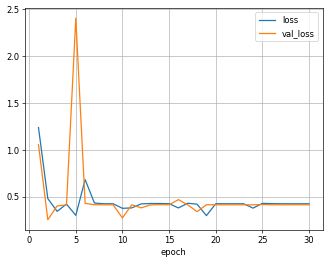

In [11]:

# GRAFICAMOS LOS RESULTADOS DEL APRENDIZAJE
# =========================================

import matplotlib.pyplot as plt

fig = plt.figure(dpi=60)
#fig = plt.figure(figsize=(10,6))
ax  = plt.subplot(111)
pd.DataFrame(hist).plot(x='epoch', y=['loss','val_loss'], grid=True, ax=ax)
#lt.ylim([0,0.010])
plt.show()


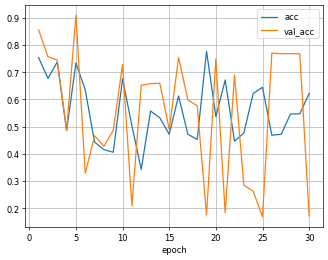

In [12]:

# GRAFICAMOS LOS RESULTADOS DEL APRENDIZAJE
# =========================================

import matplotlib.pyplot as plt

fig = plt.figure(dpi=60)
#fig = plt.figure(figsize=(10,6))
ax  = plt.subplot(111)
pd.DataFrame(hist).plot(x='epoch', y=['acc','val_acc'], grid=True, ax=ax)
#lt.ylim([0,0.010])
plt.show()


#Comprobamos con alguno de los grid de las simulaciones, la detección de los **agentes mutantes**.

In [13]:

from sklearn.metrics import confusion_matrix

torch.set_printoptions(precision=2)

X_prueba, y_prueba = next(iter(dataloader['val']))
y_prediccion = model(X_prueba)

y_prob = torch.argmax(softmax(y_prediccion), axis=1)
#y_prob[1]


In [ ]:

#y_prueba[1]


In [1]:

#y_prob[1].shape


In [2]:

#y_prueba[1].shape


In [3]:
#y_prob[1, 1]

In [4]:
#y_prueba[1, 1]

In [5]:
#y_prob.shape, y_prueba.shape

In [6]:

# SALEN BIEN LOS CANALES: 2 canales por cada imagen que hemos metido --> lote de 10 videos (los cuales cada uno tiene 40 frames)
# -----------------------
#y_prediccion.shape


In [ ]:

# PODRÍAMOS CONSIDERAR 40 REPETICIONES DE LA PREDICCIÓN (como si fuera un ensamblado)
# y tomar el máximo como predicción GLOBAL
# -----------------------------------------------------------------------------------


#Elegimos un caso para evaluar el clasificador binario. Empleamos la matriz de confusión:

In [14]:

confusion_matrix(y_prueba[1].flatten().numpy(), y_prob[1].flatten().numpy())


array([[  883, 25957],
       [  124,  4396]])

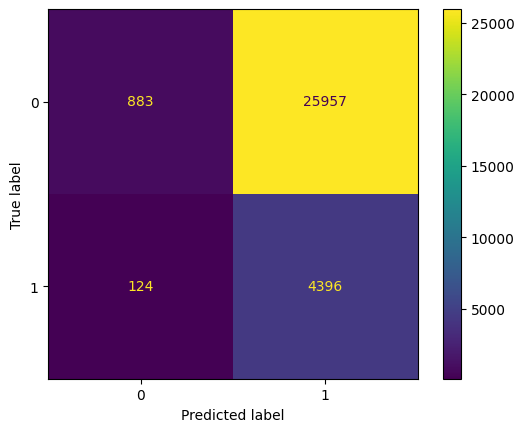

In [15]:

from sklearn.metrics import ConfusionMatrixDisplay

# Agente emocional         --> código: 0
# Agente mutante (traidor) --> código: 1
# --------------------------------------
ConfusionMatrixDisplay.from_predictions(y_prueba[1].flatten().numpy(), y_prob[1].flatten().numpy())



# <font color="brown"><b><u>EVALUACIÓN de RESULTADOS</u></b></font>.

(Empleamos matrices de confusión para diseccionar cómo se producen los errores.)


##<b>1)</b> Probamos con todos los píxeles de los frames (de 28x28) del conjunto de **DATOS de ENTRENAMIENTO**.

In [16]:

from functools import reduce

predicciones_train  = []
observaciones_train = []

# Iteramos por el conjunto de datos de Validación
# -----------------------------------------------
for x_b, y_b in dataloader['train']:
  y_pred = model(x_b)
  y_prob = torch.argmax(softmax(y_pred), axis=1)
  # Se añaden como arrays a la lista, por lo que convertimos previamente a una lista
  # El resultado es una lista de lista, por lo que las reducimos a una sola más abajo
  # (Esto es así porque el procedimiento confusion_matrix sólo opera datos de 1 dimensión)
  predicciones_train.append(list(y_prob.numpy().flatten()))
  observaciones_train.append(list(y_b.numpy().flatten()))

data_pred_train = reduce(lambda a, b: a+b, predicciones_train)
data_obs_train  = reduce(lambda a, b: a+b, observaciones_train)

confusion_matrix(data_obs_train, data_pred_train)


array([[  71808, 2054832],
       [  14439,  367721]])

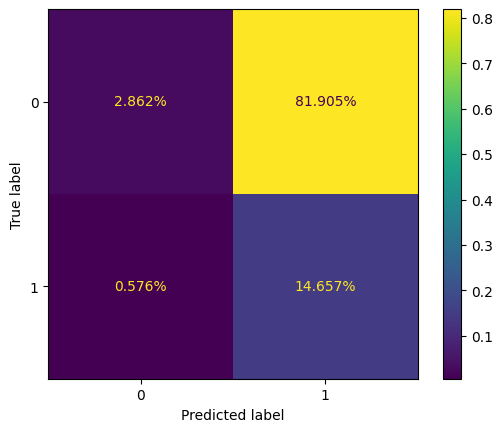

In [17]:

ConfusionMatrixDisplay.from_predictions(data_obs_train, data_pred_train, normalize='all', values_format='.3%')


##<b>2)</b> Ahora probamos con todos los píxeles de los frames (de 10x10) del conjunto de **DATOS de VALIDACIÓN**.

In [18]:

from functools import reduce

predicciones  = []
observaciones = []

# Iteramos por el conjunto de datos de Validación
# -----------------------------------------------
for x_b, y_b in dataloader['val']:
  y_pred = model(x_b)
  y_prob = torch.argmax(softmax(y_pred), axis=1)
  # Se añaden como arrays a la lista, por lo que convertimos previamente a una lista
  # El resultado es una lista de lista, por lo que las reducimos a una sola más abajo
  # (Esto es así porque el procedimiento confusion_matrix sólo opera datos de 1 dimensión)
  predicciones.append(list(y_prob.numpy().flatten()))
  observaciones.append(list(y_b.numpy().flatten()))

data_pred = reduce(lambda a, b: a+b, predicciones)
data_obs  = reduce(lambda a, b: a+b, observaciones)

confusion_matrix(data_obs, data_pred)



array([[ 19647, 515993],
       [  3812,  87748]])

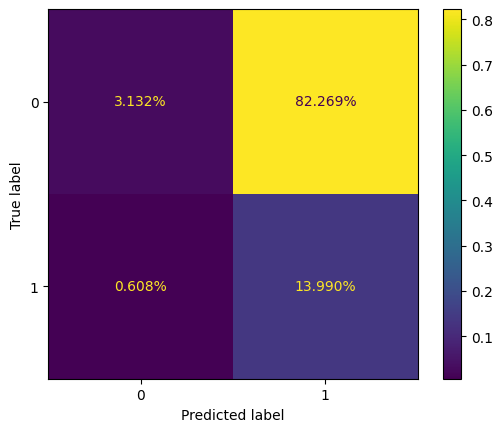

In [19]:

ConfusionMatrixDisplay.from_predictions(data_obs, data_pred, normalize='all', values_format='.3%')


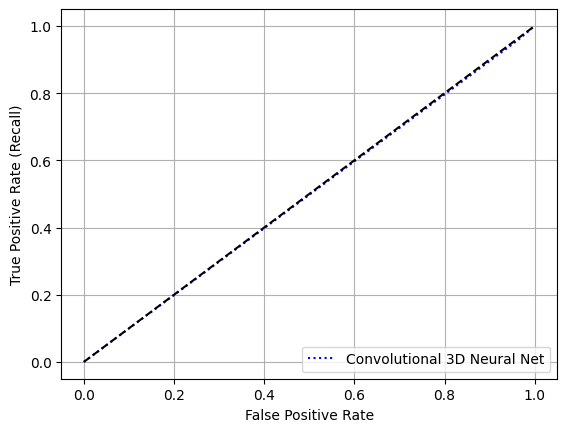

In [21]:

from sklearn.metrics import roc_curve

# CURVA ROC  (Creo que son 'scores' lo que se le debe pasar
# como segundo argumento. No sé si se puede hacer así)
# ---------------------------------------------------------
fpr, tpr, thresholds = roc_curve(data_obs, data_pred)
plt.plot(fpr, tpr, 'b:', label='Convolutional 3D Neural Net')
plt.plot([0, 1], [0, 1], 'k--')
#plt.axis([0, 1, 0, 1])     # Libro de Aurelien Geron
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


#<font color='red'>PRUEBAS</font> (Por si tengo que construir un ensamblado con la respuesta más frecuente entre las 40 matrices - una por cada frame -, aunque como la respuesta misma se repite por todo el lote no debería hacer falta)

In [ ]:

# Consulta: How does one use 3D convolutions on standard 3 channel images?
# https://stackoverflow.com/questions/57484508/how-does-one-use-3d-convolutions-on-standard-3-channel-images
# EJEMPLO:
# --------

torch.set_printoptions(precision=2)

torch.random.manual_seed(0)
N,C,D,H,W = 1,3,1,7,7
img = torch.randn(N,C,D,H,W)

# PARÁMETROS
# ----------
in_channels = C
out_channels = 2
kernel_size = 3
# -------------------

padding = kernel_size // 2

# RED
# ---
conv = torch.nn.Conv3d(in_channels, out_channels, kernel_size, padding=padding)
#conv = torch.nn.Sequential(
#    torch.nn.Conv3d(in_channels, out_channels, kernel_size, padding=1),
#    torch.nn.ReLU(),
#    torch.nn.Conv3d(n_filtros, 2, kernel_size, padding=1)
#)


# SALIDA:
# -------
# Le pasamos un video (N=1), con 3 canales (C=3), y una profundidad de 1 frames (D=1): N,C,D,H,W = 1,3,1,7,7
# Las dimensiones de la imagen son de: 7x7

out = conv(img)

print(out)
print(out.size())



tensor([[[[[ 0.40, -0.45,  0.33, -0.21,  0.28,  0.35, -0.22],
           [-0.07, -0.21, -0.18, -0.02,  0.00,  0.59, -0.22],
           [ 0.01, -0.10,  0.19, -0.32, -0.19, -0.11,  0.20],
           [ 0.24,  0.63,  0.60,  0.41, -0.25,  0.61,  0.36],
           [ 0.01, -0.39, -0.03,  0.10,  0.29, -0.13,  0.31],
           [-0.29,  0.02,  0.16,  0.03,  0.57,  0.11,  0.06],
           [ 0.14,  0.31,  0.24,  0.32,  0.59, -0.11, -0.18]]],


         [[[ 0.35,  0.22,  0.26,  0.38,  0.13,  0.01, -0.07],
           [-0.30,  0.33,  0.46,  0.33,  0.26, -0.37,  0.03],
           [ 0.08,  0.27,  0.13,  0.21,  0.30,  0.27, -0.29],
           [ 0.25, -0.45, -0.20, -0.50, -0.02, -0.03, -0.26],
           [ 0.27, -0.08, -0.21,  0.03,  0.25,  0.69, -0.27],
           [-0.15,  0.15,  0.03, -0.15,  0.33,  0.32,  0.27],
           [-0.07, -0.07, -0.32,  0.10, -0.37,  0.06,  0.41]]]]],
       grad_fn=<ConvolutionBackward0>)
torch.Size([1, 2, 1, 7, 7])


In [ ]:

import numpy as np
np.set_printoptions(precision=2)

# size = 7x7
v = np.zeros((7,7))


for i in range(7):
  for j in range(7):
    v[i,j] = max(out[0,:,0,i,j])

#matriz_numpy = out.squeeze(0).detach().numpy()
#matriz_numpy
#np.max(out.detach().numpy())

v


array([[ 0.4 ,  0.22,  0.33,  0.38,  0.28,  0.35, -0.07],
       [-0.07,  0.33,  0.46,  0.33,  0.26,  0.59,  0.03],
       [ 0.08,  0.27,  0.19,  0.21,  0.3 ,  0.27,  0.2 ],
       [ 0.25,  0.63,  0.6 ,  0.41, -0.02,  0.61,  0.36],
       [ 0.27, -0.08, -0.03,  0.1 ,  0.29,  0.69,  0.31],
       [-0.15,  0.15,  0.16,  0.03,  0.57,  0.32,  0.27],
       [ 0.14,  0.31,  0.24,  0.32,  0.59,  0.06,  0.41]])

##<font color="red">La anterior estructura al pasar a 28x28 da resultados con una precisión muy baja. Es prácticamente una elección aleatoria. Probamos las modificaciones que hice hace 2 años y que mejoraban los resultados y que ahora transforman completamente los resultados anteriores.

#OPTIMIZANDO LA ESTRUCTURA:

#Puede que haya diseñado la red de manera no óptima. Releyendo el libro de PYTORCH, creo que para aprovechar realmente la información y detectar patrones en la secuencia de imágenes, creo que he de dar profundidad en el kernel.

En las pruebas utilizaba un tamaño de kernel = 3. Esto se traduce en la práctica, ya que también maneja profundidad, en un kernel: (3,3,3).

Teniendo en cuenta que manejamos un grid, el frame para capturar la actividad de los vecinos tendría que ser cuadricular 3x3. Pero creo que tenemos que darle profundidad, en la medida de lo posible que capture todo el pack de frames. Sería un kernel irregular con volumen.

Tipo: (40,3,3)

(*Podría utilizar OPTUNA para ver si se puede optimizar hasta el valor óptimo*).

In [ ]:

import pandas as pd

# CARGAMOS LA BASE DE DATOS SIN PERMUTAR LAS FILAS (grid de 20x20, y población 85-15 emocionales/mutantes)
# ------------------------------------------------
bd_simulaciones = pd.read_csv('bd_100simulaciones_20x20_emo85_vs_15.csv')


#Variables explicativas: **X**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

size       = 28  # <------------------------------------------------------------------- LA POBLACIÓN 2 ES DE UN GRID DE 20x20
num_frames = 40
df         = bd_simulaciones.copy()

lista_RGBs         = []
lista_simulaciones = []

X            = []

nombre_columnas_ROJO  = ['r' + str(indice) for indice in range(size*size)]
nombre_columnas_VERDE = ['g' + str(indice) for indice in range(size*size)]
nombre_columnas_AZUL  = ['b' + str(indice) for indice in range(size*size)]

# Iteramos por las 8000 filas de la base de datos de prueba
for fila in range(len(bd_simulaciones)):
  canal_r = pd.array(df[nombre_columnas_ROJO].iloc[fila]).reshape(size,size)
  canal_v = pd.array(df[nombre_columnas_VERDE].iloc[fila]).reshape(size,size)
  canal_a = pd.array(df[nombre_columnas_AZUL].iloc[fila]).reshape(size,size)

  # CUIDADO que np.dstack apila los tres valores de cada pixel
  # ----------------------------------------------------------
  frame = np.array([canal_r, canal_v, canal_a])

  lista_RGBs.append(frame)

  if ((fila+1) % num_frames == 0):
    lista_simulaciones.append(np.array(lista_RGBs))
    lista_RGBs = []


X = np.array(lista_simulaciones)
X.shape


(100, 40, 3, 20, 20)

#Target: **Y**.

In [ ]:
lista_targets            = []
lista_targets_simulacion = []

for fila in range(len(bd_simulaciones)):
  lista_id_agentes = bd_simulaciones.iloc[fila]['Target'].replace('[','').replace(']','')
  target = [int(caracter) for caracter in lista_id_agentes.split(',')]
  target = np.array(target)
  target = target.reshape(size,size)

  # Con los paréntesis  '['  ']' sale de dimensión: (8000, 1, 10, 10)   # <-------------------------- Aquí ajusto la DIMENSIÓN
  #lista_targets.append([target])
  # Si queremos de dimensión: (8000, 10, 10)
  lista_targets_simulacion.append(target)

  if ((fila+1) % num_frames == 0):
    lista_targets.append(np.array(lista_targets_simulacion))
    lista_targets_simulacion = []

Y = np.array(lista_targets)
Y.shape


(100, 40, 20, 20)

#**CONVERSIÓN EN TENSORES DE PyTorch**.

In [ ]:
import numpy as np
import torch

# PRIMERO TENEMOS QUE EXTRAER LA MATRIX:  X
# y los valores del TARGET:               Y
#
# Luego pasaremos (X, Y) al Dataset que creamos a continuación.
# --------------------------------------------------------------

X_train = X
Y_train = Y

# CREAMOS UNA CLASE PARA LOS DATOS
# ================================

class Dataset_frames(torch.utils.data.Dataset):
  def __init__(self, X, Y):
    # self.X = torch.tensor(X).float()
    self.X = torch.tensor(X).permute(0,2,1,3,4).float()
    self.Y = torch.tensor(Y).long()

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    return self.X[ix], self.Y[ix]


# SELECCIONANDO GRUPOS DE OBSERVACIONES PARA VALIDACIÓN
# -----------------------------------------------------

from sklearn.model_selection import train_test_split

X_subset, X_val, Y_subset, Y_val = train_test_split(X_train, Y_train, test_size = 0.2)

dataset = {
    'train' : Dataset_frames(X_subset, Y_subset),
    'val'   : Dataset_frames(X_val, Y_val)
}

# Al bajar el batch_size mejora mucho el entrenamiento. Debe ser que si pongo muchos, queda muy poca muestra
# Con 30 sale muy malo. Con 10 mejora mucho

dataloader = {
    'train' : torch.utils.data.DataLoader(dataset['train'], batch_size=10,   shuffle=False),
    'val'   : torch.utils.data.DataLoader(dataset['val'],   batch_size=10, shuffle=False)
}


#**<font color='red'>v2</font>: DEFINICIÓN DE LA RED Y MÉTODO PARA EL ENTRENAMIENTO**.

In [22]:

from sklearn.metrics import accuracy_score

# Fijamos el número de canales, filtros y profundidad de la imagen (número de frames de la animación)
# ----------------------------------------------------------------
n_in        = 3 # 40
n_filtros   = 40                                                                                       # 25 Mayo 2023
kernel_size = (40,3,3)   # <-------------------------------------------------------------------------- #  CAMBIO 3 por tupla (_,3,3)
deepth      = 40  # Tomamos 40 frames de animación (parece que itera automáticamente por los índices profundidad y altura y anchura)

# CONSTRUIMOS EL MODELO
# =====================

def softmax(x):
  return torch.exp(x) / torch.exp(x).sum(axis=-1, keepdims=True)

# ---------------------------------------------------------------------
# Probamos inicialmente con un grid (10x10)
# ---------------------------------------------------------------------

def build_model(c=3, n_filtros=n_filtros, kernel_size=3):        # <---------------------- MODIFICAR (Definir la RED CONVOLUCIONAL)
  padding = kernel_size // 2
  model = torch.nn.Sequential(
      torch.nn.Conv3d(n_in, n_filtros, kernel_size, padding=padding),
      torch.nn.ReLU(),
      torch.nn.Conv3d(n_filtros, 2, kernel_size, padding=1)
  )
  return model


# DEFINIMOS LA FUNCIÓN DE ENTRENAMIENTO
# =====================================

def fit(model, dataloader, epochs=10, log_each=1):
   criterion = torch.nn.CrossEntropyLoss()
   optimizer = torch.optim.SGD(model.parameters(), lr=0.8)

   l, acc         = [], []
   val_l, val_acc = [], []

   for e in range(1, epochs+1):
      _l, _acc = [], []
      model.train()  # <------------------------------------------ MODO de ENTRENAMIENTO
      for x_b, y_b in dataloader['train']:
        y_pred = model(x_b)
        loss   = criterion(y_pred, y_b)
        _l.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_probas = torch.argmax(softmax(y_pred), axis=1)
        # Los SCORES de SKLEARN no aceptan matrices, así que hay que convertirlas en dimensión 1D (usar flatten())
        _acc.append(accuracy_score(y_b.numpy().flatten(), y_probas.detach().numpy().flatten()))

      l.append(np.mean(_l))
      acc.append(np.mean(_acc))
      if not e % log_each:
        print(f"Epoch {e}/{epochs} loss {l[-1]:.5f} acc {acc[-1]:.5f}")
        #print(f"Epoch {e}/{epochs} loss {l[-1]:.5f}")


      model.eval()  # <------------------------------------------- MODO de EVALUACIÓN
      _l, _acc = [], []
      with torch.no_grad():
        for x_b, y_b in dataloader['val']:
          y_pred = model(x_b)
          loss   = criterion(y_pred, y_b)
          _l.append(loss.item())
          y_probas = torch.argmax(softmax(y_pred), axis=1)
          _acc.append(accuracy_score(y_b.numpy().flatten(), y_probas.numpy().flatten()))
      val_l.append(np.mean(_l))
      val_acc.append(np.mean(_acc))

   return {'epoch':list(range(1,epochs+1)), 'loss':l, 'acc': acc, 'val_loss': val_l, 'val_acc': val_acc}
   #return {'epoch':list(range(1,epochs+1)), 'loss':l, 'val_loss': val_l}




In [23]:

# INSTANCIAMOS EL MODELO
# ======================

# Imprimimos junto al número de Epoch, el valor de la función de pérdida y la accuracy (Roza el 90%)
model  = build_model()
hist   = fit(model, dataloader, 30)



Epoch 1/30 loss 0.96489 acc 0.66643
Epoch 2/30 loss 0.78583 acc 0.69294
Epoch 3/30 loss 0.37595 acc 0.68947
Epoch 4/30 loss 0.27380 acc 0.76427
Epoch 5/30 loss 0.22635 acc 0.85074
Epoch 6/30 loss 0.05493 acc 0.94610
Epoch 7/30 loss 0.03778 acc 0.96801
Epoch 8/30 loss 0.02474 acc 0.97603
Epoch 9/30 loss 0.01655 acc 0.97929
Epoch 10/30 loss 0.01218 acc 0.98126
Epoch 11/30 loss 0.00968 acc 0.98257
Epoch 12/30 loss 0.00808 acc 0.98352
Epoch 13/30 loss 0.00696 acc 0.98438
Epoch 14/30 loss 0.00613 acc 0.98523
Epoch 15/30 loss 0.00547 acc 0.98604
Epoch 16/30 loss 0.00495 acc 0.98676
Epoch 17/30 loss 0.00452 acc 0.98742
Epoch 18/30 loss 0.00416 acc 0.98791
Epoch 19/30 loss 0.00385 acc 0.98834
Epoch 20/30 loss 0.00360 acc 0.98871
Epoch 21/30 loss 0.00337 acc 0.98903
Epoch 22/30 loss 0.00318 acc 0.98932
Epoch 23/30 loss 0.00301 acc 0.98957
Epoch 24/30 loss 0.00285 acc 0.98981
Epoch 25/30 loss 0.00272 acc 0.99003
Epoch 26/30 loss 0.00260 acc 0.99020
Epoch 27/30 loss 0.00249 acc 0.99034
Epoch 28/3

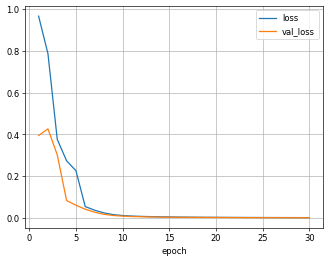

In [24]:

# GRAFICAMOS LOS RESULTADOS DEL APRENDIZAJE
# =========================================

import matplotlib.pyplot as plt

fig = plt.figure(dpi=60)
#fig = plt.figure(figsize=(10,6))
ax  = plt.subplot(111)
pd.DataFrame(hist).plot(x='epoch', y=['loss','val_loss'], grid=True, ax=ax)
#lt.ylim([0,0.010])
plt.show()


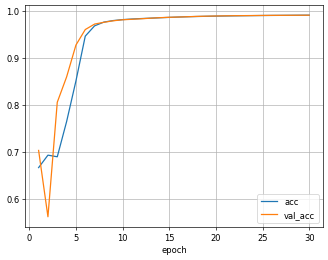

In [25]:

# GRAFICAMOS LOS RESULTADOS DEL APRENDIZAJE
# =========================================

import matplotlib.pyplot as plt

fig = plt.figure(dpi=60)
#fig = plt.figure(figsize=(10,6))
ax  = plt.subplot(111)
pd.DataFrame(hist).plot(x='epoch', y=['acc','val_acc'], grid=True, ax=ax)
#lt.ylim([0,0.010])
plt.show()



In [26]:

from sklearn.metrics import confusion_matrix
torch.set_printoptions(precision=2)
from functools import reduce

predicciones  = []
observaciones = []

# Iteramos por el conjunto de datos de Validación
# -----------------------------------------------
for x_b, y_b in dataloader['val']:
  y_pred = model(x_b)
  y_prob = torch.argmax(softmax(y_pred), axis=1)
  # Se añaden como arrays a la lista, por lo que convertimos previamente a una lista
  # El resultado es una lista de lista, por lo que las reducimos a una sola más abajo
  # (Esto es así porque el procedimiento confusion_matrix sólo opera datos de 1 dimensión)
  predicciones.append(list(y_prob.numpy().flatten()))
  observaciones.append(list(y_b.numpy().flatten()))

data_pred = reduce(lambda a, b: a+b, predicciones)
data_obs  = reduce(lambda a, b: a+b, observaciones)

confusion_matrix(data_obs, data_pred)


array([[529770,   5870],
       [     0,  91560]])

##Comprobamos de nuevo la clasificación de todos los píxeles del conjunto de VALIDACIÓN

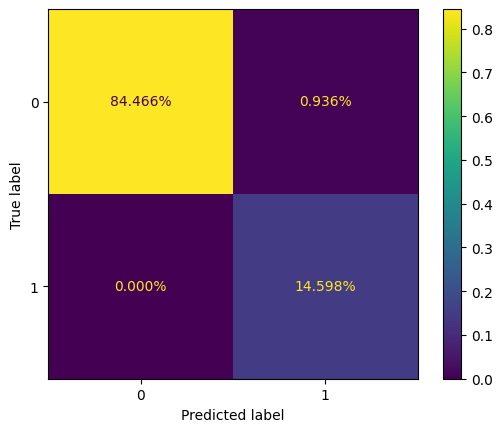

In [27]:

from sklearn.metrics import ConfusionMatrixDisplay

# Agente emocional         --> código: 0
# Agente mutante (traidor) --> código: 1
# --------------------------------------

ConfusionMatrixDisplay.from_predictions(data_obs, data_pred, normalize='all', values_format='.3%')


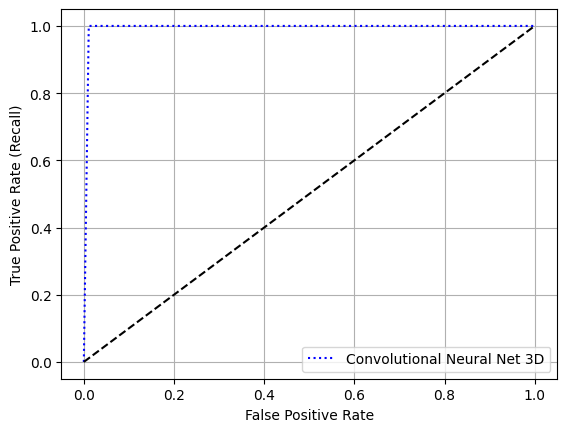

In [28]:

from sklearn.metrics import roc_curve

# CURVA ROC  (Creo que son 'scores' lo que se le debe pasar
# como segundo argumento. No sé si se puede hacer así)
# ---------------------------------------------------------
fpr, tpr, thresholds = roc_curve(data_obs, data_pred)
plt.plot(fpr, tpr, 'b:', label='Convolutional Neural Net 3D')
plt.plot([0, 1], [0, 1], 'k--')
#plt.axis([0, 1, 0, 1])     # Libro de Aurelien Geron
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()
